# Drawing Connections Between User, Product and Sales
### Describing Sales Patterns in the Video Game Industry

This report analyzes video game sales data to gain an understanding about how features such as game genre, platforms and critic reviews inform financial peformance on a global scale. The video game industry is a billion dollar industry that can be mined for patterns and trends between users, product and sales. This triad is representative of an important set of connections in business analytics and gaining a better understanding of its dynamics within the video game industry may help to strengthen general business analytical approaches. 

This report outlines several rounds of Exploratory Data Analysis (EDA) and data visualization towards answering questions such as, "Which platforms are leading in sales? Which ones are growing and shrinking? How do user and professional reviews affect sales for different platforms? Can we generalize about genres with high and low sales?" 

In order to answer these questions, this report analyzes a dataset from The Entertainment Software Rating Board, and mostly centers on the years 2006 to 2016. This period of time spans definitive sales trajectories for several signficant platforms like PS2, X360 and Wii. Of course, this report also centers the dataset's unique data on ratings and reviews. 

For future consideration: The video game industry is uniquely qualified to shed light on competitive markets where partnerships between platforms and product have signficant impact on global sales and financial performance. This is one of topics touched on by researcher, Dmitri Williams, in the article "Structure and competition in the U.S. home video game industry" and also discussed on a closer, country-specific level by Aoyama and Izushi in their article, "Hardware gimmick or cultural innovation? Technological, cultural,and social foundations of the Japanese video game industry". The relationship between product and platform in the video game industry is not only an academic area of study but also generates headlines in 2020 on popular platforms like [IGN](https://www.ign.com/articles/microsofts-complicated-history-with-the-xbox-in-japan-and-its-plans-for-the-future) (See "Microsoft's Complicated History With the Xbox In Japan (And its Plans for the Future", 2020). 

### Table of Contents

* [Getting to Know the Games Dataset](#firstlook)
* [Cleaning the Games Dataset](#cleaning)
* [Building the Dataset](#building)
* [Exploratory Data Analysis](#exploratory)
    * [Insights](#insights)
        * [Upward tick in new games began around 1993](#insight1)
        * [PS2 gaming platform leads in overall sales in period 1980-2016](#insight2)
        * [Popular gaming platforms now reaching all time low in sales](#insight2)
            * [Case Studies](#casestudy)
        * [Aggregated global sales (2006-2016) vary across gaming platforms](#aggregated)
        * [Is there a relationship between reviews and sales for the platform PS3?](#aggregated)
        * [Grand Theft Auto V had most profitable partnership with PS3 gaming platform](#grand)
        * [Action is highest selling genre while Strategy is the lowest](#action)  
* [User Profiles by Region](#profiles)
* [Testing Between Groups](#testing)
* [Conclusion](#conclusion)

## Getting to Know the Games Dataset  <a class="anchor" id="firstlook"></a>

### Importing Libraries and Data <a class="anchor" id="importdata"></a>

We'll start by calling the pandas, numpy, matplotlib.pyplot and scipy libraries. These are all of the libraries used in this report. 

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
from IPython.display import display

In [2]:
# Importing data source
games_data = pd.read_csv('/Users/mitzibandera/Data Files/Gaming/games.csv')

### Inspecting the Data <a class="anchor" id="inspectdata"></a>

By using different methods to view the dataset, we can begin to spot patterns, missing values and issues that need to be addressed. 

In [3]:
# Inspecting data 
games_data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
# Inspecting data 
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
# Inspecting data 
games_data['User_Score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
0.7       2
1.9       2
1.5       2
0         1
9.7       1
Name: User_Score, Length: 96, dtype: int64

Here, we use the duplicated() method to look for any rows that have duplicate values. After several rounds trying different combinations of data, we find that there are many rows where the name and year of release of a game are the same. While this may seem strange at first, we know that this dataset contains popular games that were sold throughout many distinct platforms. The "duplicate" rows are representative of this, so don't have to worry about addressing this. 

In [6]:
# Spot duplicates 
duplicate_data = games_data.duplicated(subset = ['Name', 'Year_of_Release'], keep = 'first') 
print(duplicate_data.value_counts())

False    12428
True      4287
dtype: int64


We also use the isnull() method to look for missing values and indeed, we find missing values across different columns. In Step 3, we will clean the dataset and deal with missing values. 

In [7]:
# Looking for missing values using isnull()
print(games_data.columns[games_data.isnull().any()])

Index(['Name', 'Year_of_Release', 'Genre', 'Critic_Score', 'User_Score',
       'Rating'],
      dtype='object')


Finally, we find that the first year represented in this dataset is 1980 and the last year is 2016. 

In [8]:
games_data['Year_of_Release'].min()

1980.0

In [9]:
games_data['Year_of_Release'].max()

2016.0

## Cleaning the Games Dataset <a class="anchor" id="cleaning"></a>

Having gotten to know our dataset a bit, we'll move right into cleaning messy areas such as column names with uppercase letters, replacing missing values when appropriate and converting data types. 

#### Replacing Column Names <a class="anchor" id="colname"></a>

In [10]:
# Replacing the column names (making them lowercase)
games_data.columns = games_data.columns.str.lower()

#### Replacing Missing Values <a class="anchor" id="missing"></a>

In [11]:
# Inspecting number of missing values 
null_data = games_data.isnull().sum()
null_data

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [12]:
# Creating a new dataframe with rows that have missing values
null_data = games_data.loc[games_data.isnull().any(axis=1)]
# Inspecting dataframe for patterns
null_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [13]:
# Inspecting data slice 
# null_data.describe()
# null_data['platform'].value_counts()
# null_data['name'].value_counts()

Right away, we can observe that there are only 2 rows missing names and 2 rows missing genre. These rows are inconsequential to the large dataset, so we'll go ahead and remove it. It's very likely that removing these rows will not change the calculations, visualizations and conclusions drawn in this report. 

In [14]:
# Discarting rows with missing name and genre 
games_data =  games_data.dropna(subset=['name', 'genre'])

We also see that the year of release for 269 games is missing as well. Since the year of release is ingtegral to the  the game, we have a tougher choice to make. Do we drop or keep these rows? Before doing anything, let's look at the games missing year of release. We'll find out if there is any patterns that might connect games with missing years in this dataset. 

In [15]:
# Displaying rows missing year of release 
pd.set_option('display.max_rows', 500)
y_o_r = games_data[games_data['year_of_release'].isnull()]
y_o_r.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


In [16]:
# Inspecting data slice 
# y_o_r.describe()
# y_o_r['platform'].value_counts()
# y_o_r['name'].value_counts()

After taking a closer look, we don't see any relationships, connections or patterns between the missing data in the year_of_release column and other values in the dataset. It's hard to say if these values are definitely MCAR since we don't know how this database was put together, the sources of data etc. It's safe to say however that because there are no observable connections in this dataset, that dropping these rows will likely not affect our overall results. 

In [17]:
# Discarting rows with missing year
games_data =  games_data.dropna(subset=['year_of_release'])

At this point, we still have a lot of missing values in the user_score, critic_score and rating column. There are too many rows for us to consider discarting rows with missing values. There are also too many rows for us to consider replacing missing values with a representative value, like the average. For this project, we will have to keep the rows as they are, so that we don't change the initial data distribution and not affect our conclusions. With pandas, we can still continue work with missing values in our future calculations.

In [18]:
# games_data['user_score'] = games_data.user_score.astype(float)

#### Coverting Wrong Data Types <a class="anchor" id="datatype"></a>

In [19]:
# Changing year_of_release to date and time data type 
games_data['year_of_release'] = pd.to_datetime(games_data['year_of_release'], format = "%Y").dt.strftime('%Y') 

## Building the Games Dataset  <a class="anchor" id="building"></a>

#### Eliminating Outliers

Before we can make any other changes using sales information, we'll have to eliminate outliers so that our future calculations and distributions are more accurate. We'll remove outliers from na_sales, jp_sales and eu_sales. We'll note that outliers still may exist in the other columns with numerical data like user_score and critic_score. 

In [20]:
# Inspecting data length before deleting outliers 
len(games_data)

16444

In [21]:
# Removing outliers from na_sales
z_scores = st.zscore(games_data['na_sales'])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3) 
games_data = games_data[filtered_entries]

In [22]:
# Removing outliers from jp_sales
z_scores = st.zscore(games_data['jp_sales'])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3) 
games_data = games_data[filtered_entries]

In [23]:
# Removing outliers from eu_sales
z_scores = st.zscore(games_data['eu_sales'])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3) 
games_data = games_data[filtered_entries]

In [24]:
# Removing outliers from other_sales
z_scores = st.zscore(games_data['other_sales'])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3) 
games_data = games_data[filtered_entries]

In [25]:
# Inspecting new data length without outliers 
len(games_data)

15485

While we have sales information that tell us how much each game sold in North America, Europe and Japan, we don't have a quick and easy way to see total global sales. We'll take a moment to calculate the total sales (the sum of sales in all regions) for each game and put these values in a separate column.

In [26]:
# Creating a new column for the sum of all sales
games_data['sum_sales'] = games_data['na_sales'] + games_data['eu_sales']
+ games_data['jp_sales'] + games_data['other_sales']
games_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
346,SOCOM: U.S. Navy SEALs,PS2,2002,Shooter,2.53,0.81,0.06,0.24,82.0,7.9,M,3.34
348,Pokemon Snap,N64,1999,Simulation,2.23,0.68,0.66,0.06,NaN,NaN,NaN,2.91
350,Resident Evil 4,PS2,2005,Action,2.08,0.83,0.46,0.25,96.0,8.9,M,2.91
356,Luigi's Mansion,GC,2001,Action,2.38,0.67,0.46,0.10,78.0,8.5,E,3.05
399,WWF War Zone,PS,1998,Fighting,2.47,0.76,0.00,0.13,NaN,NaN,NaN,3.23


In [27]:
# Adding another column with the year of release data as an integer
# Having it as datetime didn't work for my histograms
games_data['year_of_release_int'] = games_data['year_of_release']
games_data['year_of_release_int'] = games_data['year_of_release_int'].astype(int)

## Exploratory Data Analysis <a class="anchor" id="exploratory"></a>

#### Insights  <a class="anchor" id="insights"></a>

The games data is rich with insights; we'll draw a couple of important conclusions in the next EDA phase of this report. This next section will be largely comprised by data visualizations that include histograms, bar charts and scatter plots. These will help us to find and describe  insights about this large games dataset. Short summaries of insights are bold, italicized headings below. 

##### Upward tick in new games began around 1993  <a class="anchor" id="insight1"></a>

This histogram shows the number of games released across several decades. We can see a significant uprise in released games in the year 1993. The upward tick continues well into the 2000s and peaks in 2009 and 2010. There is a sharp and lasting decline that brings us into 2016. 

Text(0, 0.5, 'Count')

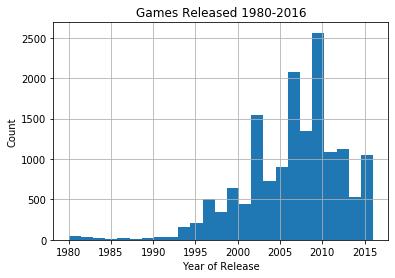

In [28]:
# Histogram showing how many games were released in different years 
games_data['year_of_release_int'].hist(bins = 25)
plt.title('Games Released 1980-2016')
plt.xlabel('Year of Release')
plt.ylabel('Count')

##### PS2 gaming platform leads in overall sales in period 1980-2016 <a class="anchor" id="insight2"></a>

A simple grouping by platform and ordering of our data shows the best performing platforms. We see that PS2, X360, Wii and PS3 outsold other platforms and neared an impressive 1 billion total global sales. 

In [29]:
# Finding platforms with the greatest total sales
games_data.groupby('platform')['sum_sales'].sum().nlargest(10)

platform
PS2     538.53
X360    497.74
Wii     376.59
PS3     351.99
PS      349.13
DS      333.63
XB      224.19
GBA     206.83
GC      146.49
PC      142.36
Name: sum_sales, dtype: float64

##### Popular gaming platforms now reaching all time low in sales <a class="anchor" id="insight3"></a> 

##### Case Studies <a class="anchor" id="casestudy"></a> 

Our first histogram showed a bell curve to the distribution of games released across the years represented in this dataset. Could this also coincide with the shape of the distribution of global game sales? In the next few case studies we'll look at the distribution of global sales for the overall best performing gaming platforms: PS2, X360, PS3, Wii and DS. 

A pivot table will help us to group the data a bit differently this time. The focus is now grouping information by year of release and platform type, and aggregating all global sales for these platforms year by year. 

In [30]:
# Pivot table showing aggregate sales for every platform, with release year as index 
data_pivot = pd.pivot_table(games_data, index = ['year_of_release_int', 'platform'],
                                values = ['sum_sales'], aggfunc = [np.sum])

Case Study: PS2 Gaming Platform

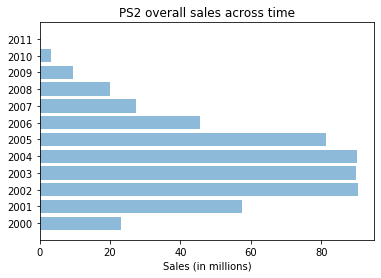

In [31]:
# Line graph showing PS2 sales across time 
PS2_data_pivot = data_pivot.query("platform in 'PS2'")
year_of_release = np.arange(2000, 2012).astype(str)
y_pos = np.arange(len(year_of_release))
sum_sales = PS2_data_pivot[('sum', 'sum_sales')]

plt.barh(y_pos, sum_sales, align='center', alpha=0.5)
plt.yticks(y_pos, year_of_release)
plt.xlabel('Sales (in millions)')
plt.title('PS2 overall sales across time')

plt.show()

Case Study: X360 Gaming Platform

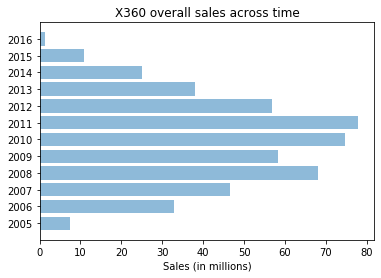

In [32]:
# Line graph showing X360 sales across time 
X360_data_pivot = data_pivot.query("platform in 'X360'")
year_of_release = ('2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016')
y_pos = np.arange(len(year_of_release))
sum_sales = X360_data_pivot[('sum', 'sum_sales')]

plt.barh(y_pos, sum_sales, align='center', alpha=0.5)
plt.yticks(y_pos, year_of_release)
plt.xlabel('Sales (in millions)')
plt.title('X360 overall sales across time')

plt.show()

Case Study: PS3 Gaming Platform

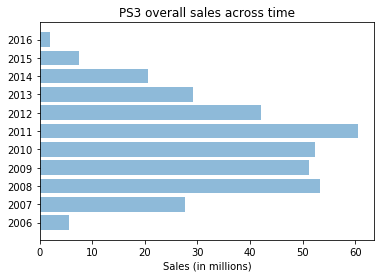

In [33]:
# Line graph showing PS3 sales across time 
PS3_data_pivot = data_pivot.query("platform in 'PS3'")
year_of_release = ('2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016')
y_pos = np.arange(len(year_of_release))
sum_sales = PS3_data_pivot[('sum', 'sum_sales')]

plt.barh(y_pos, sum_sales, align='center', alpha=0.5)
plt.yticks(y_pos, year_of_release)
plt.xlabel('Sales (in millions)')
plt.title('PS3 overall sales across time')

plt.show()

Case Study: Wii Gaming Platform

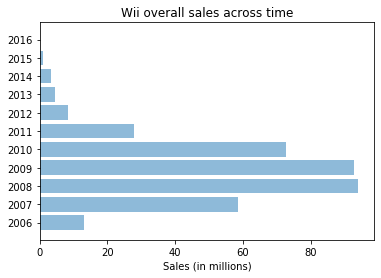

In [34]:
# Line graph showing Wii sales across time 
Wii_data_pivot = data_pivot.query("platform in 'Wii'")
year_of_release = ('2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016')
y_pos = np.arange(len(year_of_release))
sum_sales = Wii_data_pivot[('sum', 'sum_sales')]

plt.barh(y_pos, sum_sales, align='center', alpha=0.5)
plt.yticks(y_pos, year_of_release)
plt.xlabel('Sales (in millions)')
plt.title('Wii overall sales across time')

plt.show()

Case Study: DS Gaming Platform

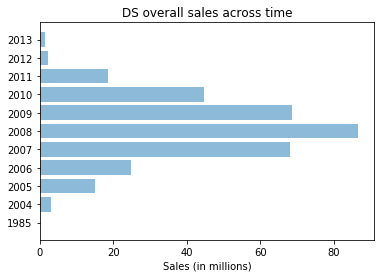

In [35]:
# Line graph showing DS sales across time 
DS_data_pivot = data_pivot.query("platform in 'DS'")
year_of_release = ('1985', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013')
y_pos = np.arange(len(year_of_release))
sum_sales = DS_data_pivot[('sum', 'sum_sales')]

plt.barh(y_pos, sum_sales, align='center', alpha=0.5)
plt.yticks(y_pos, year_of_release)
plt.xlabel('Sales (in millions)')
plt.title('DS overall sales across time')

plt.show()

##### Aggregated global sales (2006-2016) vary across gaming platforms   <a class="anchor" id="aggregated"></a>

To begin painting a picture that is representative of currently successful games, we'll have to discard some of our data. By cutting our data to represent 10 years between 2006 and 2016, we can draw more relevant insights about global sales. To this point, the next pivot table shows each platform in our dataset, the accompaying number of games released during this time period and the aggregated global sales for these. 

In [36]:
# Discarting data for games released in years prior to 2006 
games_data = games_data.query("year_of_release_int > 2005")

In [37]:
# Pivot table showing aggregate sales for every platform, with platform as index 
platform_data_pivot = pd.pivot_table(games_data, index = ['platform'],
                                values = ['sum_sales'], aggfunc = [len, np.sum])
platform_data_pivot.sort_values(by = ('sum', 'sum_sales'), ascending = False)

,len,sum
,sum_sales,sum_sales
platform,,
X360,1142.0,490.41
Wii,1238.0,376.59
PS3,1185.0,351.99
DS,1922.0,315.27
PS2,739.0,106.03
PC,754.0,98.81
XOne,231.0,90.00
PSP,1049.0,89.44


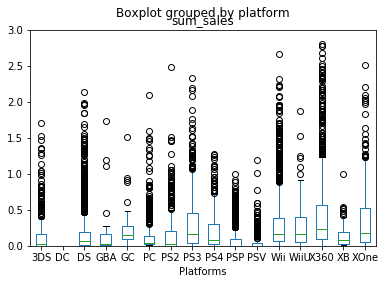

In [38]:
# Boxplot to assess the distribution of global sales of all games 
games_data.boxplot(by ='platform', column =['sum_sales'], grid = False) 

plt.xlabel('Platforms')
plt.ylabel('')
plt.ylim(0,3)

plt.show()

This box plot visualization shows the differences in sales appear to be significant. I should note that this distribution doesn't distinguish or group data by year of release or name of game. This boxplot shows overall sales data for each platform in the period 2006-2016. 

##### Which platforms are leading in sales? Which ones are growing or shrinking?

By grouping our data by platform and year of release, we can see that the only platform which has shown consistent positive growth is PS4. All other gaming platforms have experienced ups and downs, and generally experiencing an early rise in global sales followed by rapid decline. 

In [39]:
# Creating a new dataframe where data is grouped by multiple columns
grouped_multiple = games_data.groupby(['platform', 'year_of_release_int']).agg({'sum_sales': ['sum']})
# Flattening after aggregating by renaming the new columns
grouped_multiple.columns = ['sum_sales']
# Reseting index
grouped_multiple = grouped_multiple.reset_index()
grouped_multiple.head()

,platform,year_of_release_int,sum_sales
0,3DS,2011,20.74
1,3DS,2012,17.60
2,3DS,2013,11.40
3,3DS,2014,6.38
4,3DS,2015,9.22


#### PS4 gaming platform shows overall positive growth then stalls

/Users/mitzibandera/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
posx and posy should be finite values
posx and posy should be finite values


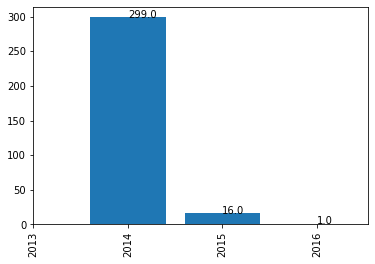

In [40]:
# Querying for PS4 platform
ps4_growth = grouped_multiple.query('platform in "PS4"')
# Adding yearly change as a percentage  
ps4_growth[['yearly_change']]=round((ps4_growth[['sum_sales']].pct_change())*100)
# Bar chart
x = ('2013', '2014', '2015', '2016')
y = ps4_growth[('yearly_change')]

plt.bar(x, y)

plt.xticks(x, rotation='vertical')

for a,b in zip(x, y):
    plt.text(a, b, str(b))
plt.show()

##### Is there a relationship between reviews and sales for the platform PS3? <a class="anchor" id="relationship"></a>

Is our review data a good indicator of what sales would b (or vice versa)? Below, we will be analyzing a potential relationship between these elements. In order to explore a relationship, we will utilize a scatterplot and correlation to observe any positive or negative correlations. The scatterplot function in pandas requires the y column to be all numeric and since the user_score column in our games data has the string 'tbd' in it, we will now create a new dataframe to look just at PS3 data and also discard the 87 rows with the string 'tbd' in it. 

In [41]:
# Querying for just data on PS3 
PS3_data = games_data.query("platform in 'PS3'")

In [42]:
# Querying for just numerical data in user_score column, without 'tbd' string value 
PS3_data = PS3_data.query("user_score not in 'tbd'")

In [43]:
# Changing the user_score data type from object to float 
PS3_data['user_score'] = PS3_data.user_score.astype(float)

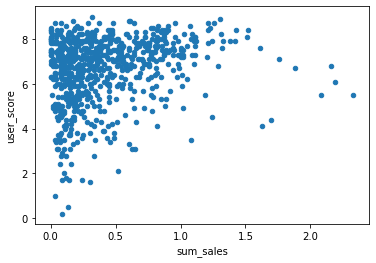

0.20591507559036337


In [44]:
# Scatterplot to show relationship between user_score and sales
PS3_data.plot(x = 'sum_sales', y = 'user_score', kind = 'scatter')
plt.show()
print(PS3_data['sum_sales'].corr(PS3_data['user_score']))

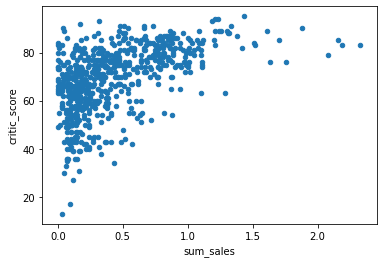

0.5159584884092175


In [45]:
# Scatterplot to show relationship between critic_score and sales
PS3_data.plot(x = 'sum_sales', y = 'critic_score', kind = 'scatter')
plt.show()
print(PS3_data['sum_sales'].corr(PS3_data['critic_score']))

We see that there exists a positive correlation for both scatterplots. However, only the relationship between sales and critic score shows enough of a strong positive correlation to indicate that the relationship can be reproduced. Stepping back, it makese sense that global sales would be strongly correlated to critic scores as critic reviews may be widely distributed and prompt customers to become aware or excited about purchasing a new game. However, for now we won't continue to speculate about the cause of the relationship, and just take note.

The weak positive relationship between user_score and global sales is also another area to further explore. One would think that the better a user reviews a game, the higher the quality of the game would be as most users tend to positively review high quality products. The weak correlation might indicate that users are not happy with the products they are purchasing, or maybe that they are purchasing games without placing too much importance on quality. Again, we won't speculate or come to a conclusion before conducting additional statistical tests and collecting more data. 

##### Grand Theft Auto V had most profitable partnership with PS3 gaming platform <a class="anchor" id="grand"></a>

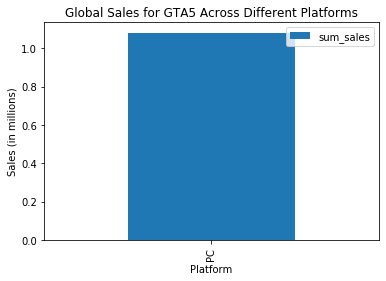

In [46]:
# Querying for Grand Theft Auto V across all platforms 
GTA5_data = games_data.query("name in 'Grand Theft Auto V'")
# Bar plot showing distribution of sales across different platforms 
GTA5_data.plot(x = 'platform', y = 'sum_sales', kind = 'bar')

plt.xlabel('Platform')
plt.ylabel('Sales (in millions)')
plt.title('Global Sales for GTA5 Across Different Platforms')

plt.show()

##### Action is highest selling genre while Strategy is the lowest <a class="anchor" id="action"></a>

In [47]:
# Creating a pivot table to group data by genre
genre_data_pivot = pd.pivot_table(games_data, index = ['genre'],
                                values = ['sum_sales'], aggfunc = [len, np.sum])
# Creating a new column to show proportion between number of games released in that genre and overall global sales
genre_data_pivot['proportion'] = genre_data_pivot[('len', 'sum_sales')]/genre_data_pivot[('sum', 'sum_sales')]
# Showing sorted pivot table 
genre_data_pivot.sort_values(by = ('sum', 'sum_sales'), ascending = False)

,len,sum,proportion
,sum_sales,sum_sales,
genre,,,
Action,2257.0,529.79,4.260179
Sports,1185.0,345.26,3.432196
Misc,1196.0,250.54,4.773689
Shooter,653.0,236.55,2.760516
Role-Playing,932.0,155.08,6.009801
Racing,528.0,138.63,3.808699
Simulation,584.0,124.68,4.683991
Fighting,393.0,94.76,4.147320


How can i rename these columns? 

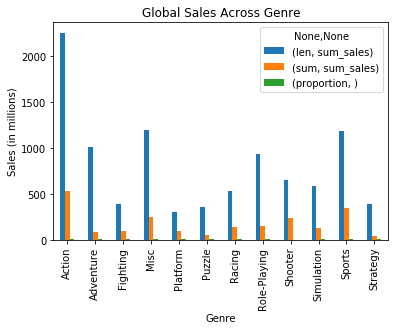

In [48]:
# Bar plot showing sales across genre 
genre_data_pivot.plot(kind='bar')

plt.xlabel('Genre')
plt.ylabel('Sales (in millions)')
plt.title('Global Sales Across Genre')

plt.show()

Unsurprisingly, action is the best performing game genre bringing in nearly 1 billion in global sales. By drawing the pivot table and corresponding bar chart above, we can also easily see the proportion of games to sales. The table shows us that the higher the proportion, the less games that genre needed to have higher sales. Clearly, game genres like Adventure and Strategy have a niche customer base!  

## User Profiles by Region <a class="anchor" id="profiles"></a>

Online retailers can learn about the success of games on a global scale, however knowing what types of platforms and genres sell best by region can be transformative for marketing purposes. In this next section, we show the differences and similarities in the top selling platforms and genres across North America, Europe and Japan. Some platforms and genres remain consistently popular while we can also observe drastic differences, especially in Japan. 

We find that North America is the biggest consumer, followed by Europe and Japan trails far behind. Not only do sales differ greatly in Japan, but we also see platforms we haven't seen before and see role-playing is a distinctively popular genre in this country. 

#### North America <a class="anchor" id="na"></a>

In [49]:
# Showing top five platforms
games_data.groupby('platform')['na_sales'].sum().nlargest(5)

platform
X360    345.21
Wii     270.21
DS      240.30
PS3     209.88
PS2      74.44
Name: na_sales, dtype: float64

In [50]:
# Showing top five genres
games_data.groupby('genre')['na_sales'].sum().nlargest(5)

genre
Action          335.20
Sports          253.79
Misc            173.75
Shooter         144.39
Role-Playing    105.39
Name: na_sales, dtype: float64

#### Europe <a class="anchor" id="eu"></a>

In [51]:
# Showing top five platforms
games_data.groupby('platform')['eu_sales'].sum().nlargest(5)

platform
X360    145.20
PS3     142.11
Wii     106.38
DS       74.97
PC       69.10
Name: eu_sales, dtype: float64

In [52]:
games_data.groupby('genre')['eu_sales'].sum().nlargest(5)

genre
Action     194.59
Shooter     92.16
Sports      91.47
Misc        76.79
Racing      58.29
Name: eu_sales, dtype: float64

#### Japan <a class="anchor" id="jp"></a>

In [53]:
# Showing top five platforms
games_data.groupby('platform')['jp_sales'].sum().nlargest(5)

platform
DS     67.78
PS3    55.53
PSP    54.78
3DS    41.51
PS2    29.31
Name: jp_sales, dtype: float64

In [54]:
games_data.groupby('genre')['jp_sales'].sum().nlargest(5)

genre
Role-Playing    83.81
Action          73.18
Misc            37.41
Adventure       28.24
Sports          27.90
Name: jp_sales, dtype: float64

## Testing Between Groups <a class="anchor" id="testing"></a>

Now that we've done quite a bit of data analysis regarding global sales of gaming platforms, let's move onto more subjective data like that in our user_score column. Games are reviewed by customers and the ESRB attaches a user score rating on a scale of 0 to 10. The user score data can give us insight that is more specific to the gamer's experience and if they enjoyed playing the game or not. 

We might work to compare two different types of games and their reviews to mine for successful games, learn about any differences in user scores and more. Today we will test for a statistically significant difference between the average user ratings of the Xbox One and the PC platforms, and a separate test on the difference in user ratings based on the Actions and Sports genre.  

From our previous data analysis, we know that PC is an old-timer, having introduced their first game in 2006. Meanwhile, XOne has only started distribution in 2016. Despite their longer time on the market, PC has only accumulated about 8 million in global sales more than XOne. Let's first explore if the user ratings are on average higher, than the user ratings of XOne. 

In order to conduct our statistical t-test, we'll have to discard any string and missing data from the user score column. If we discard this data, it will only be 1719 rows of strings data and 3558 rows of missing data. Let's move forward with discarding the data and testing our null hypothesis that XOne and PC platforms have the same average user rating.  

In [55]:
# Querying for just numerical data in user_score column, without 'tbd' string value 
games_data = games_data.query("user_score not in 'tbd'")

In [56]:
# Discarting rows with missing data 
games_data =  games_data.dropna(subset=['user_score'])

In [57]:
# Changing the user_score data type from object to float 
games_data['user_score'] = games_data.user_score.astype(float)

#### Average user ratings of the Xbox One and PC platforms are the same <a class="anchor" id="useraverage"></a>

In [58]:
# Querying for the data to find xbox user score average
xbox_user = games_data.query("platform in 'XOne'")

In [59]:
# Querying for the data to find pc user score average
pc_user = games_data.query("platform in 'PC'")

In [60]:
# Setting a critical statistical significance level
alpha = .05 

# Testing the hypothesis that the means of the two independent populations are equal
results = st.ttest_ind(
        xbox_user['user_score'], 
        pc_user['user_score'])

print('p-value:', results.pvalue)

# Comparing the p-value with the statistical significance level
if (results.pvalue < alpha): 
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 0.054224368976248626
We can't reject the null hypothesis


#### Average user ratings for the Action and Sports genres are different <a class="anchor" id="genreaverage"></a>

In [61]:
# Querying for the data to find the Action genre user score average
action_user = games_data.query("genre in 'Action'")

In [62]:
# Querying for the data to find the Sport genre user average
sport_user = games_data.query("genre in 'Sports'")

In [63]:
# Setting a critical statistical significance level
alpha = .05 

# Testing the hypothesis that the means of the two independent populations are equal
results = st.ttest_ind(
        action_user['user_score'], 
        sport_user['user_score'])

print('p-value:', results.pvalue)

# Comparing the p-value with the statistical significance level
if (results.pvalue < alpha): 
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 2.3722483899243593e-09
We reject the null hypothesis


In [64]:
games_data.groupby('genre')['user_score'].mean()

genre
Action          6.815182
Adventure       7.014000
Fighting        7.049138
Misc            6.612195
Platform        6.820745
Puzzle          7.016867
Racing          6.584810
Role-Playing    7.386765
Shooter         6.752827
Simulation      6.651707
Sports          6.376998
Strategy        6.847423
Name: user_score, dtype: float64

Our statistical tests showed that no statistically significant difference exists between the ratings users gave towards games released with XBox One versus PC gaming platforms. This finding, in addition to our earlier observation of the weak correlation between global sales and user ratings, means that user ratings is not a clear or reliable indicator of the success of a game (based on sales and customer experience). Meanwhile, we saw that there is a statistically significant difference in user ratings when it comes to genres, and this means that user ratings are a better indicator of the succcess of a game when it comes to the genres of Action versus Sports.